# PROYECTO 2 #
# Ingeniería de features, Modelos avanzados e Interpretación de modelos
## PROYECTO: Análisis de mercado inmobiliario ##
### PROBLEMA ###  
Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.
### RESUMEN DEL PROYECTO ###
Aplica transformación de datos y entrena Modelos Avanzados para desarrollar con mayor profundidad tu modelo de Machine Learning. ¿Qué puedes aprender del problema que estás abordando mediante el estudio de tu propio modelo?
### CONSIGNA ###
En este proyecto profundizarás lo desarrollado en el proyecto 01 (“Primer modelo de Machine Learning”). El objetivo es aplicar las técnicas incorporadas (Transformación de Datos, Optimización de Hiperparámetros, Modelos Avanzados, etc.) para generar un modelo que tenga un mejor desempeño que el modelo generado en el proyecto anterior. Luego, interpreta ese modelo para responder la siguiente pregunta: ¿qué podemos aprender de nuestro problema estudiando el modelo que generamos?
## PARTE A - Transformación de Datos ###

Elige cuáles de las siguientes tareas son apropiadas para su dataset. Justifica e implementa:

1. Detección y eliminación de Outliers

2. Encoding

3. Imputación de valores faltantes

4. Escalado de datos

5. Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).

Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - y evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. ¿Hay una mejora en su desempeño? Sea cual sea la respuesta, intenta explicar a qué se debe.

### Análisis Exploratorio de Datos

1. __Se importan las librerías__ necesarias para trabajar en la consigna.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

2. __Se realiza la carga el dataset__ usando las funcionalidades de Pandas.

In [2]:
properati = pd.read_csv('../Data/DS_Proyecto_01_Datos_Properati.csv')

In [3]:
properati.shape # Filas y columnas

(146660, 19)

* *El DataSet, cuenta con **146.660 Filas**, y **19 Columnas**.*

In [4]:
properati.head(3) # Primeras 3 instancias (filas)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta


3. __Valores Faltantes:__ se imprimen en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna. En un principio es a mera exposición, ya que por el momento no vamos a descartar ninguno de ellos,ni realizar imputación de datos.

In [5]:
properati.isnull().sum() # Nombres de las columnas y su cantidad de faltantes

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

* *Variables con elementos faltantes:*  
    *1. `Superficie Cubierta` **15%** (21.614);*  
    *2. `Superficie Total` **14%** (20.527);*  
    *3. Latitud y Longitud 7% c/u (10.000 c/u);*  
    *4. Baños 4% (6.000).*

4. __Tipos de propiedad:__ Se explora cuántos tipos de propiedad hay publicados en el dataset y la cantidad de instancias por cada tipo de propiedad.

In [6]:
pd.unique(properati['property_type'])

array(['Departamento', 'PH', 'Casa', 'Lote', 'Casa de campo', 'Oficina',
       'Otro', 'Local comercial', 'Cochera', 'Depósito'], dtype=object)

In [7]:
print(properati['property_type'].value_counts())

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64


* *En el Dataset de Properati se encuentran publicados __10 Tipos de Propiedad__ en la zona geográfica analizada.*  
* *Se destacan:*  
    *1. `Departamentos` con 107.326 unidades __(73%)__;*  
    *2. `Casas` con 21.521 (15%);*  
    *3. `PH` con 14.298 instancias (10%).*

Text(0.5, 1.0, 'Número de Publicaciones por Tipo de Propiedad')

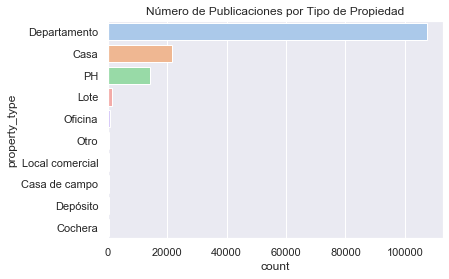

In [8]:
sns.countplot(data = properati, y = 'property_type', order = properati['property_type'].value_counts().index, palette='pastel')
plt.title('Número de Publicaciones por Tipo de Propiedad')

5. __Se visualizan las regiones__ a las cuales pertenecen las publicaciones.

Text(0.5, 1.0, 'Número de Publicaciones por Barrio/Partido de la Provincia de Bs. As')

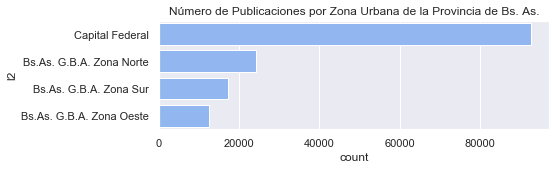

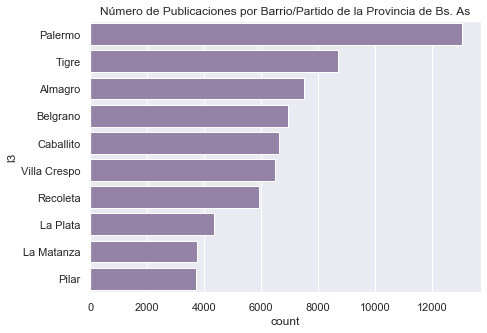

In [9]:
f, ax = plt.subplots(figsize = (7,2))
sns.countplot(y = 'l2', data = properati, order = properati['l2'].value_counts().index, color = '#82B3FF')
plt.title('Número de Publicaciones por Zona Urbana de la Provincia de Bs. As.')

f, ax = plt.subplots(figsize = (7,5))
sns.countplot(y = 'l3', data = properati, order = properati['l3'].value_counts().iloc[:10].index, color = '#957dad')
plt.title('Número de Publicaciones por Barrio/Partido de la Provincia de Bs. As')

In [10]:
print(properati['l2'].value_counts())

Capital Federal             92539
Bs.As. G.B.A. Zona Norte    24282
Bs.As. G.B.A. Zona Sur      17173
Bs.As. G.B.A. Zona Oeste    12666
Name: l2, dtype: int64


In [11]:
print(properati['l3'].value_counts())

Palermo            13073
Tigre               8718
Almagro             7527
Belgrano            6935
Caballito           6650
                   ...  
Cañuelas             108
Villa Soldati         69
Villa Riachuelo       42
Marcos Paz            35
Catalinas              5
Name: l3, Length: 89, dtype: int64


* *Las publicaciones son principalmente de `Capital Federal` **(63%)**.*  
* *Dentro de CABA, se detaca el barrio de `Palermo` (**14%** s/ CABA), seguido por Almagro, Belgrano, Caballito, Villa Crespo y Recoleta.*  
* *Dentro de AMBA, el partido de `Tigre` es el que presenta mayor número de publicaciones.*

6. __Se exponen las Estadísticas Descriptivas__, como ser la tendencia central, la dispersión y la forma de la distribución de un conjunto de datos, excluyendo los NaN valores.

In [12]:
pd.set_option('precision', 2) # Para una mejor visualización, se redujeron los decimales a 2

In [13]:
properati[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']].describe().round()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,146660.0,146660.0,140703.0,126133.0,125046.0,1.47e+05
mean,3.0,2.0,2.0,217.0,113.0,2.41e+05
std,1.0,1.0,1.0,2038.0,917.0,3.19e+05
min,1.0,0.0,1.0,10.0,1.0,5.50e+03
25%,2.0,1.0,1.0,52.0,47.0,1.11e+05
50%,3.0,2.0,1.0,78.0,68.0,1.66e+05
75%,4.0,3.0,2.0,140.0,108.0,2.65e+05
max,35.0,15.0,14.0,193549.0,126062.0,3.24e+07


* *`Superficie Total` y `Superficie Cubierta`: los valores mínimos y máximos obtenidos resultan poco razonables para dichas instancias, ya que como se observa, oscilan entre 10m2 - 193.549m2 y 1m2 - 126.062m2 respectivamente. Al respecto, se observa una `Desviación Estándar Alta`, lo cual indica que los datos se extienden sobre un amplio rango de valores.*
* *`Bedrooms = 0`, es coherente, ya que podría tratarse de `Monoambientes`, donde se comparten en un mismo ambiente, living, cocina y dormitorio.*
* *`Bathrooms = 0`, es lógica por estar trabajando con Depósitos y Lotes por ejemplo, que pueden no tener baños.*
* *`Precios`Los mínimos y máximos distan mucho de la media.*

## Transformación de Datos

### Detección y eliminación de Outliers

1. __Detección de Outliers__ a través de Boxplots, de las variables `Precio`, `Superficie Total` y `Superficie Cubierta` por considerarlas más relevantes y con mayor dispersión de datos s/ las estadísticas descriptivas previamente expuestas.

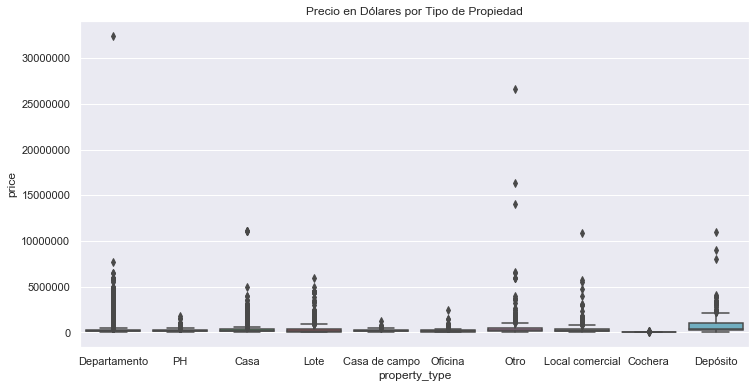

In [14]:
plt.figure(figsize = (12,6))
sns.boxplot(data = properati, x = 'property_type', y = 'price')
plt.title('Precio en Dólares por Tipo de Propiedad')
plt.ticklabel_format(axis = 'y', style = 'plain')

Text(0.5, 1.0, 'Superficie Total por Tipo de Propiedad')

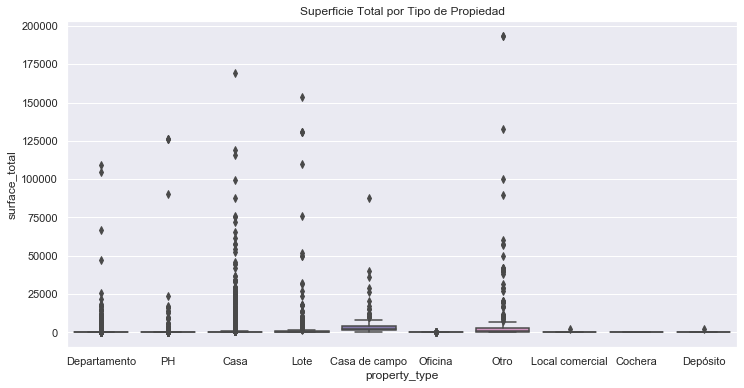

In [15]:
plt.figure(figsize = (12,6))
sns.boxplot(data = properati, x = 'property_type', y = 'surface_total')
plt.title('Superficie Total por Tipo de Propiedad')

Text(0.5, 1.0, 'Superficie Cubierta por Tipo de Propiedad')

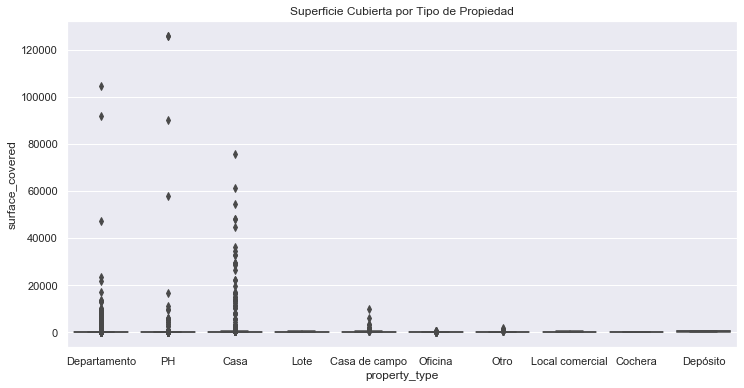

In [16]:
plt.figure(figsize = (12,6))
sns.boxplot(data = properati, x = 'property_type', y = 'surface_covered')
plt.title('Superficie Cubierta por Tipo de Propiedad')

* *Tanto en `Precios` como en `Superficie Total` se visualizan una gran cantidad de outliers.*
* *En el caso de `Precios`, los outliers más distantes de la media (por encima de ella) se observan en `Departamentos` y `Otros`.*
* *En el caso de `Superficie Total`, los outliers más distantes de la media se observan en `Departamentos`, `Lotes` y `Otros`.*
* *`Superficie Cubierta` presenta outliers principalmente en Departamentos, Casas y PH.*
* *También se observan valores **Nulos**, lo cual no es consistente.*

2. __Eliminación de Outliers:__ se procede a descartar los datos atípicos para cada tipo de propiedad.
* Primero, se realiza un **primer filtro** en el Dataset, aplicando **IQR Score**, para la variable `Precios`.

In [17]:
Q1_p = properati['price'].quantile(0.25)
Q3_p = properati['price'].quantile(0.75)
IQR_p = Q3_p - Q1_p
print (IQR_p) # Se visualiza el IQR para columna precios

154000.0


In [18]:
mask_price = properati [~ ((properati['price'] <(Q1_p - 1.5 * IQR_p)) | (properati['price']> (Q3_p + 1.5 * IQR_p)))]
properati_2 = mask_price

properati_2['price'].describe().round()

count    135678.0
mean     182308.0
std       98600.0
min        5500.0
25%      109000.0
50%      158000.0
75%      238000.0
max      496000.0
Name: price, dtype: float64

In [19]:
properati_2.shape

(135678, 19)

* *Un **7,5%** de los datos resultaron ser atípicos, de acuerdo a la metodología utilizada (IQR Score).*

* Luego, se procede a filtrar aquellas instancias en las que la `Superficie Cubierta` sea superior a la `Superficie Total`, ya que en la práctica NO es posible que ésto suceda.

In [20]:
mask_sup = (properati_2['surface_covered'] <= properati_2['surface_total'])
properati_3 = properati_2[mask_sup]
properati_3[['price','surface_total']].describe().round()

,price,surface_total
count,113736.0,113736.0
mean,185204.0,175.0
std,97906.0,1471.0
min,6000.0,10.0
25%,110000.0,50.0
50%,160000.0,73.0
75%,240000.0,120.0
max,496000.0,169000.0


In [21]:
properati_3.shape

(113736, 19)

* *La muestra se redujo casi un **15%** más.*

* __Análisis:__ se procede a visualizar la nueva distribución de los datos a partir del primer filtro realizado.

In [22]:
properati_3[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']].describe().round()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,113736.0,113736.0,112123.0,113736.0,113736.0,113736.0
mean,3.0,2.0,1.0,175.0,93.0,185204.0
std,1.0,1.0,1.0,1471.0,729.0,97906.0
min,1.0,0.0,1.0,10.0,1.0,6000.0
25%,2.0,1.0,1.0,50.0,45.0,110000.0
50%,3.0,2.0,1.0,73.0,64.0,160000.0
75%,4.0,3.0,2.0,120.0,95.0,240000.0
max,35.0,15.0,14.0,169000.0,126062.0,496000.0


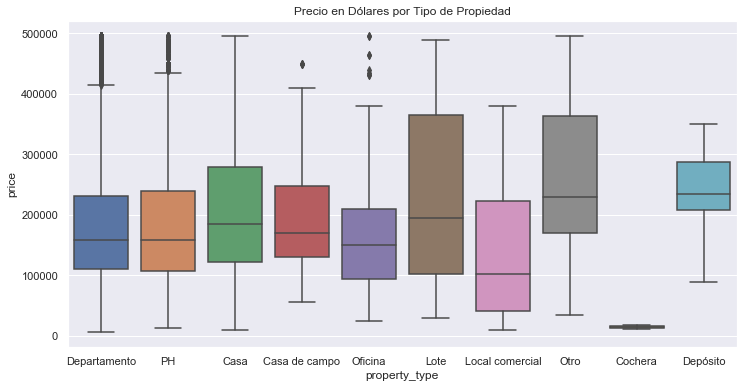

In [23]:
plt.figure(figsize = (12,6))
sns.boxplot(data = properati_3, x = 'property_type', y = 'price')
plt.title('Precio en Dólares por Tipo de Propiedad')
plt.ticklabel_format(axis = 'y', style = 'plain')

Text(0.5, 1.0, 'Superficie Total por Tipo de Propiedad')

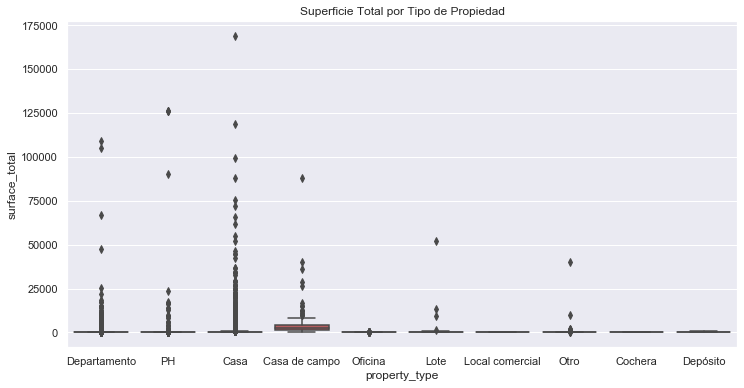

In [24]:
plt.figure(figsize = (12,6))
sns.boxplot(data = properati_3, x = 'property_type', y = 'surface_total')
plt.title('Superficie Total por Tipo de Propiedad')

Text(0.5, 1.0, 'Superficie Cubierta por Tipo de Propiedad')

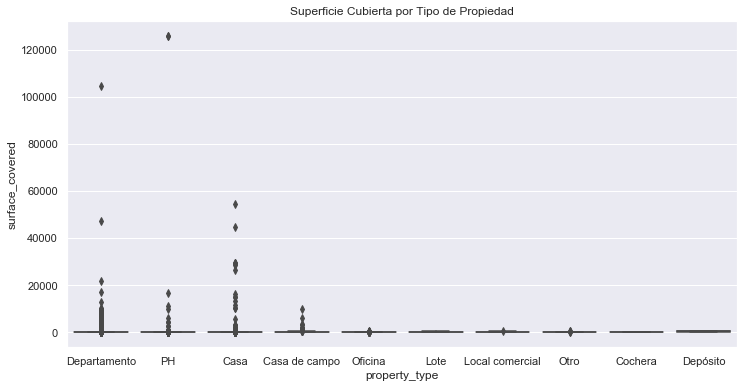

In [25]:
plt.figure(figsize = (12,6))
sns.boxplot(data = properati_3, x = 'property_type', y = 'surface_covered')
plt.title('Superficie Cubierta por Tipo de Propiedad')

* *La distribución de datos de los `Precios` expone mayor robustez.*
* *Sin embargo, en los casos de `Superficie Total` y `Superficie Cubierta` los valores atípicos siguien distando mucho de la media, oscilando entre 10m2 - 169.000m2 y 1m2 - 126.062m2 respectivamente. La Desviación Estándar sigue siendo Elevada.*

* Se realiza un **segundo filtrado**, con el fin de alcanzar valores razonables en las `Superficies`. Comenzamos con `Superficie Total`.

In [26]:
Q1_st = properati_3['surface_total'].quantile(0.25)
Q3_st = properati_3['surface_total'].quantile(0.75)
IQR_st = Q3_st - Q1_st
print (IQR_st) # Se visualiza el IQR para columna precios

70.0


In [27]:
mask_st = properati_3 [~ ((properati_3['surface_total'] <(Q1_st - 1.5 * IQR_st)) | (properati_3['surface_total']> (Q3_st + 1.5 * IQR_st)))]
properati_4 = mask_st

properati_4['surface_total'].describe().round()

count    102209.0
mean         80.0
std          42.0
min          10.0
25%          49.0
50%          68.0
75%         100.0
max         225.0
Name: surface_total, dtype: float64

In [28]:
properati_4.shape

(102209, 19)

* *En ésta ocación, la muesta fue acotada un **7,5% más**, en comparación al dataset original.*

* __Nuevo Análisis:__ a fin de observar la robustez de los datos.

In [29]:
properati_4[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']].describe().round()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,102209.0,102209.0,100864.0,102209.0,102209.0,102209.0
mean,3.0,2.0,1.0,80.0,68.0,179640.0
std,1.0,1.0,1.0,42.0,33.0,93863.0
min,1.0,0.0,1.0,10.0,1.0,6000.0
25%,2.0,1.0,1.0,49.0,44.0,110000.0
50%,3.0,2.0,1.0,68.0,60.0,156000.0
75%,3.0,2.0,2.0,100.0,83.0,230000.0
max,35.0,15.0,14.0,225.0,225.0,496000.0


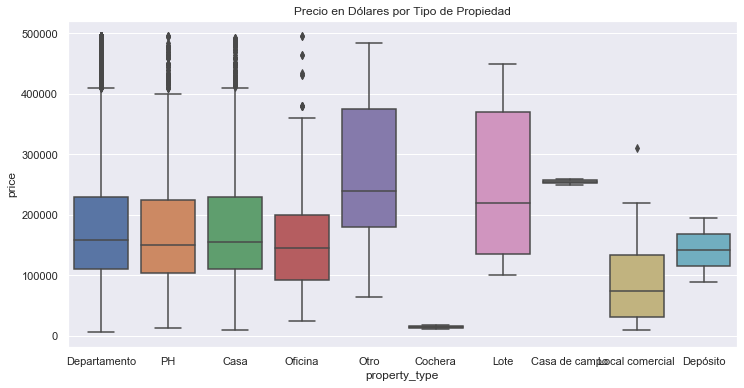

In [30]:
plt.figure(figsize = (12,6))
sns.boxplot(data = properati_4, x = 'property_type', y = 'price')
plt.title('Precio en Dólares por Tipo de Propiedad')
plt.ticklabel_format(axis = 'y', style = 'plain')

Text(0.5, 1.0, 'Superficie Total por Tipo de Propiedad')

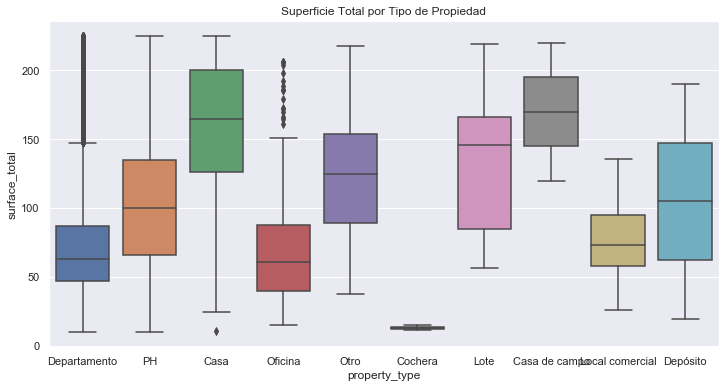

In [31]:
plt.figure(figsize = (12,6))
sns.boxplot(data = properati_4, x = 'property_type', y = 'surface_total')
plt.title('Superficie Total por Tipo de Propiedad')

Text(0.5, 1.0, 'Superficie Cubierta por Tipo de Propiedad')

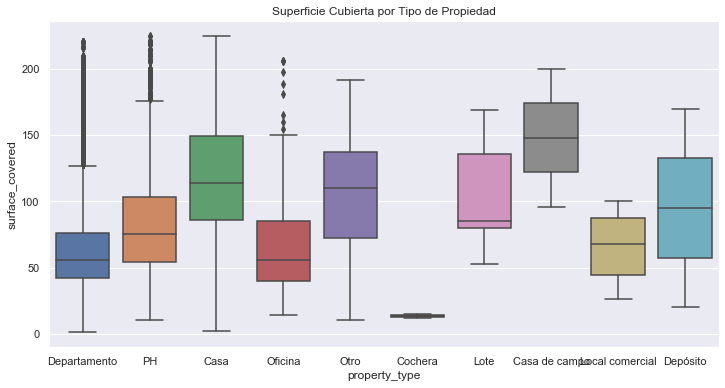

In [32]:
plt.figure(figsize = (12,6))
sns.boxplot(data = properati_4, x = 'property_type', y = 'surface_covered')
plt.title('Superficie Cubierta por Tipo de Propiedad')

* *Ahora sí. Tanto la distribución de datos de los `Precios` como de `Superficies` exponen mayor robustez.*
* *Si bien aún se verifican algunos outlies principalmente en precios, por cantidad y valores que alcanzan, sólo lo serían por tipo de propiedad y no considerando el conjunto total de los datos.*

### Imputación de Valores Faltantes

In [33]:
properati_4.isnull().sum()

start_date            0
end_date              0
created_on            0
lat                6621
lon                6621
l1                    0
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms          1345
surface_total         0
surface_covered       0
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64

* *Variables que aún cuentan con elementos faltantes:*  
    *1. Latitud y Longitud 6,5% c/u (6.621 c/u);*  
    *2. Baños 1,3% (1.345).*

* Nos enfocaremos en la imputación de datos de `Baños`, ya que en el próximo paso, trabajaremos con Departamentos, Casas y PH (a fin de comparar nuestros resultados con los del Protyecto 1), y no es posible que no hayan Baños en dichas propiedades (como sí podría ocurrir en un Depósito).
* Respecto a latitud y longitud, no se realizará ningún cambio, ya que no serán utilizadas en éste estudio para determinar el precio de las propiedades por la complejidad de su análisis.

Text(0.5, 1.0, 'Distribución de la variable Baños')

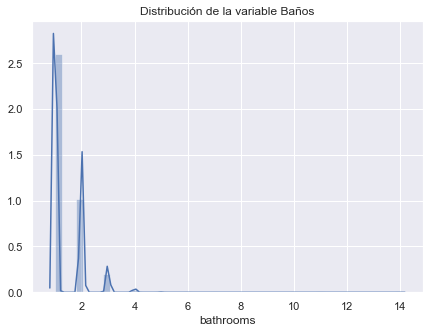

In [34]:
plt.figure(figsize = (7,5))
sns.distplot(properati_4['bathrooms']) 
plt.title('Distribución de la variable Baños')

In [35]:
median_bathrooms = properati_4['bathrooms'].median()
print(median_bathrooms)

1.0


In [36]:
mode_bathrooms = properati_4['bathrooms'].mode()
print(median_bathrooms)

1.0


In [37]:
mean_bathrooms = properati_4['bathrooms'].mean() # Ya espuesto con anterioridad
print(median_bathrooms)

1.0


* Si bien alguna de las propiedades posee 14 baños, dicho valor atípico no está influyendo en las medidas de tendencia central, ya que la media, la moda y l mediana son igual a **1.0**. *Se procede a imputar los datos faltantes con dicho valor.*
* La distribución de sus datos es asímétrica a la derecha (positiva), y la cantidad de valores nulos representa un porcentaje bajo sobre el total. Ésto ocurre por la cantidad de valores nulos observados; si ellos y sin el inmueble con 14 baños, y dados los valores de la media, mediana y moda (iguales entre sí), sería razonable obserbar una distribución normal de los datos en baños.

In [38]:
properati_4['bathrooms'] = properati_4['bathrooms'].fillna(median_bathrooms)

<ipython-input-38-aa7d24e5b751>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properati_4['bathrooms'] = properati_4['bathrooms'].fillna(median_bathrooms)


In [39]:
sum(pd.isnull(properati_4['property_type']))

0

* Todos los valores nulos de `Baños` fueron reemplazados por **1.0**, es decir por el valor de la __media, mediana y moda__.

### Selección de la Muestra

* A fin de comparar los resultados de los modelos del Proyecto 2 con los resultantes del Proyecto 1, utilizaremos la misma muestra, es decir, que nos centraremos en:
    * Los tipos de propiedad con mayor concentración, `Departamentos, Casas y PH` y;
    * En la región con mayor número de publicaciones, es decir, `Capital Federal`.

In [40]:
properati_5 = properati_4 [(properati_4['l2'] == 'Capital Federal') & ((properati_4['property_type'] == 'Departamento') | (properati_4['property_type'] == 'PH') | (properati_4['property_type'] == 'Casa'))]

In [41]:
properati_5.shape

(72037, 19)

* *La muestra se redujo en un **8% más**.*

* *Se exponen nuevamente las Estadísticas Descriptivas, con el Dataset Filtrado.*
* En su revisión, se verifica que se cumpla que la **Superficie Cubierta Mínima sea de 18m2**, basándose en el Nuevo Código de Edificación de CABA, que entró en vigencia el 1° de enero de 2019, y hablitó la construcción de **microambientes mínimos**, de hasta 18 metros cuadrados.

In [42]:
properati_5[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']].describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,72037.00,72037.00,72037.00,72037.00,72037.00,72037.00
mean,2.79,1.84,1.38,75.73,66.50,189653.35
std,1.08,0.91,0.64,38.59,32.15,94027.51
min,1.00,0.00,1.00,12.00,2.00,6000.00
25%,2.00,1.00,1.00,47.00,43.00,119300.00
50%,3.00,2.00,1.00,65.00,58.00,165000.00
75%,3.00,2.00,2.00,93.00,81.00,240000.00
max,21.00,15.00,14.00,225.00,225.00,496000.00


* *Mejora la distribución de los datos, presentando una reducción notable en el desvío estándar de los mismos.*
* *No se verifica el cumplimiento de la `Superficie Cubierta Mínima` de 18m2, por lo que a continuación, lo hacemos cumplir:*

In [43]:
mask_sup2 = (properati_5['surface_covered'] >= 18)
properati_6 = properati_5[mask_sup2]

properati_6['surface_covered'].describe().round()

count    71940.0
mean        67.0
std         32.0
min         18.0
25%         43.0
50%         58.0
75%         81.0
max        225.0
Name: surface_covered, dtype: float64

In [44]:
properati_6.shape

(71940, 19)

* *El **Dataframe Final con el que vamos a trabajar**, representa aprox. un **49% del Dataset Original**.*
* *Si bien puede parecer un porcentaje bajo, eran muchos los outliers (como propiedades con Sup. Total de 126.062m2) o mal cargados (como Sup. Total < que Sup. Cubierta).*

* *A continuación se reflejan las **nuevas distribuciones** para las `variables Superficie Total` y `Precio`:*

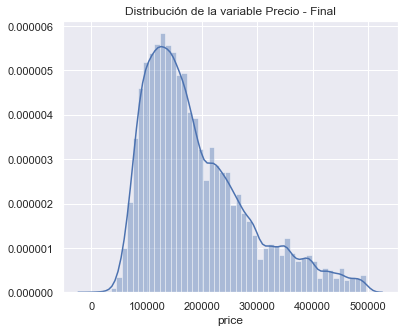

In [45]:
plt.figure(figsize = (6,5))
sns.distplot(properati_6['price'])
plt.title('Distribución de la variable Precio - Final')
plt.ticklabel_format(style = 'plain')

Text(0.5, 1.0, 'Precio en Dólares según Tipo de Propiedad - Final')

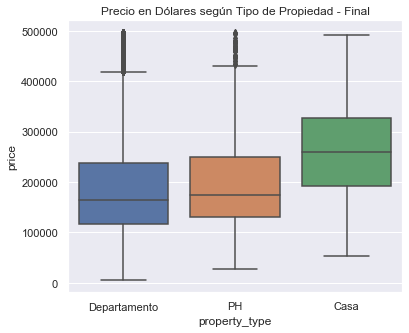

In [46]:
plt.figure(figsize = (6,5))
sns.boxplot(data = properati_6, x = 'property_type', y = 'price')
plt.title('Precio en Dólares según Tipo de Propiedad - Final')

Text(0.5, 1.0, 'Distribución de la variable Superficie Total - Final')

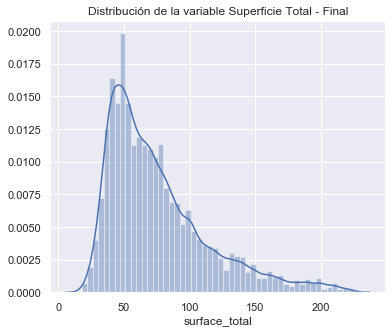

In [47]:
plt.figure(figsize = (6,5))
sns.distplot(properati_6['surface_total']) 
plt.title('Distribución de la variable Superficie Total - Final')

Text(0.5, 1.0, 'Superficie Total segú6n Tipo de Propiedad - Final')

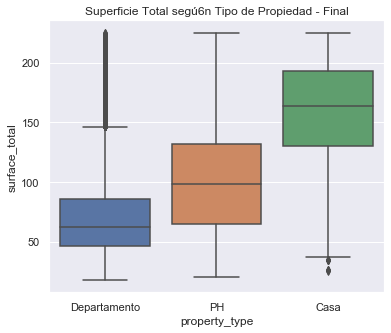

In [48]:
plt.figure(figsize = (6,5))
sns.boxplot(data = properati_6, x = 'property_type', y = 'surface_total')
plt.title('Superficie Total segú6n Tipo de Propiedad - Final')

Text(0.5, 1.0, 'Distribución de la variable Superficie Cubierta - Final')

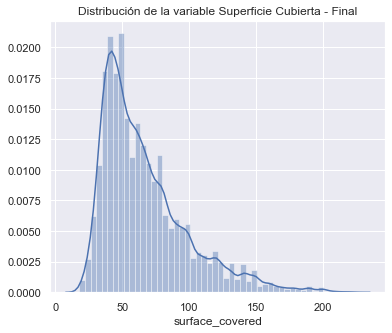

In [49]:
plt.figure(figsize = (6,5))
sns.distplot(properati_6['surface_covered']) 
plt.title('Distribución de la variable Superficie Cubierta - Final')

Text(0.5, 1.0, 'Superficie Cubierta según Tipo de Propiedad - Final')

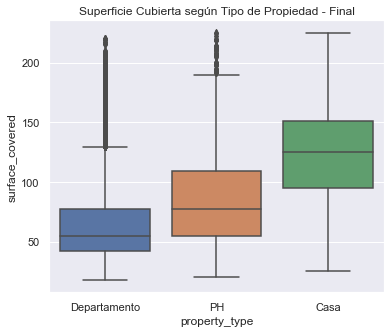

In [50]:
plt.figure(figsize = (6,5))
sns.boxplot(data = properati_6, x = 'property_type', y = 'surface_covered')
plt.title('Superficie Cubierta según Tipo de Propiedad - Final')

* *Tanto en el caso de Superficie como de Precios, se visualizan datos más consistentes.*
* *En ambos casos, es clara la distribución de datos con **asimetría positiva (o a la derecha)**, siendo la mayor parte de los precios de las propiedades, menores a U$S 250.000.*

In [51]:
#sns.pairplot(data=properati_6, hue= 'property_type', vars=['rooms','bedrooms','bathrooms','surface_total','surface_covered','price'])

* *Podemos inferir que tanto Superficie Total como Superficie Cubierta, están altamente correlacionadas con el Precio, no así el resto de las variables.*

### Generación de nuevas variables predictoras/reducción de dimensionalidad (PCA).

1. __Correlaciones Pearson:__ Primero se realiza el estudio de las correlaciones entre las variables rooms, bedrooms, bathrooms, surface_total, surface_covered y price, con el fin de exponer la existencia de correlaciones lineales.

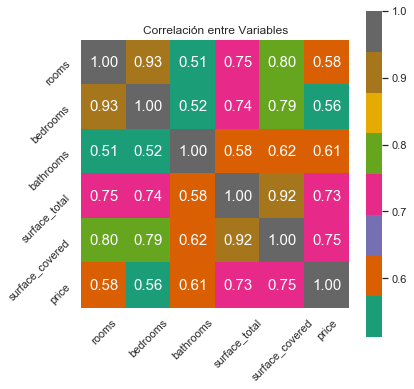

In [52]:
corr = properati_6[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']].corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15}, cmap= 'Dark2')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title('Correlación entre Variables')
plt.show()

* *Se evindencia:*
    * *Correlación Alta **(0.93)**, entre `rooms` (ambientes) y `bedrooms` (Dormitorios).*
    * *Correlación Alta **(0.92)**, entre `surface_covered` (superficie total) y `surface_total` (superficie cubierta).*
    * *Además, `surface_covered` y `surface_total`, tiene Correlación Alta y Moderadamente Alta, con todas las demás variables, excepto `bathrooms`.*
* *Por su parte, `Price` (precio) posee una correlación Moderadamente Alta con `surface_covered` **(0.75)** y `surface_total` **(0.73)**, coincidiendo con lo esperado, respecto a ser las __variables más relevantes para determinar el precio de los inmuebles__.*

2. __Correlaciones Spearman:__ Para adicionar información al estudio, se expone la correlación a través del método Spearman, con el fin de visualizar la existencia de correlaciones No lineales.

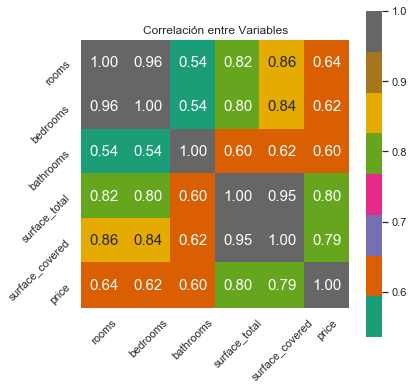

In [53]:
corr = properati_6[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']].corr(method='spearman')
plt.figure(figsize=(6,6))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15}, cmap= 'Dark2')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title('Correlación entre Variables')
plt.show()

* No se observan importantes cambios entre ambos tipos de correlaciones.
* *Se mantienen las Altas correlaciones entre `rooms` (ambientes) y `bedrooms` (Dormitorios), y entre `surface_covered` (superficie total) y `surface_total` (superficie cubierta).*
* `surface_covered` y `surface_total`, incrementan su correlación positiva con`rooms` (ambientes) y `bedrooms`*.
* *Por su parte, `Price` (precio) posee una correlación algo mayor con `surface_covered` **(0.79)** y `surface_total` **(0.80)**.*

3. __Aplicación de Reducción de Dimensionalidad - PCA.__

* Se implementa la técnica de PCA, ya que es particularmente útil en el tratamiento de datos donde existen múltiples - colinealidades entre las características / variables como ocurre en el presente estudio.

* Comenzamos con 3 componentes principales, que están altamente correlacionados entre sí y uno de ellos parecería no tener tanta influencia con la etiqueta `y` que queremos predecir (bedrooms).

*Se seleccionan las variables predictoras (`X`) y la variable a predecir (`y`).*

In [54]:
X = properati_6[['surface_total','surface_covered','bedrooms']]
y = properati_6[['price']]

*Escalamos los datos.*

In [55]:
# Escalado de Datos
from sklearn.preprocessing import StandardScaler
X_escalado = StandardScaler().fit_transform(X)
X_escalado[:5]

array([[ 1.6650609 ,  2.28701398,  5.67598365],
       [-0.15002952, -0.26688705, -0.92160507],
       [-0.7982761 , -0.6717738 , -0.92160507],
       [ 0.23891842, -0.51604812, -0.92160507],
       [-0.51304761, -0.32917732, -0.92160507]])

*Definimos la matriz de Covarianza.*

In [56]:
# Matriz de covarianza
features = X_escalado.T
cov_matrix = np.cov(features)
cov_matrix[:5]

array([[1.0000139 , 0.92200911, 0.7369367 ],
       [0.92200911, 1.0000139 , 0.79053734],
       [0.7369367 , 0.79053734, 1.0000139 ]])

* En la diagonal de la matriz de covarianzas, tenemos varianzas, y los demás elementos son las covarianzas.
* Los elementos diagonales son idénticos y la matriz es simétrica.

*Eigendecomposition*

In [57]:
# Eigendecomposition
valores, vectores = np.linalg.eig (cov_matrix) 
valores [: 5]

array([2.63554579, 0.07314992, 0.291346  ])

In [58]:
vectores [: 5]

array([[-0.58419539, -0.64711233, -0.48985853],
       [-0.59574699,  0.75179207, -0.28265565],
       [-0.55118171, -0.12670562,  0.82470868]])

*A partir de esto, podemos calcular el porcentaje de varianza explicada (explained variance) por componente principal:*

In [59]:
varianzas_explicadas = [] 
for i in range (len (valores)): 
    varianzas_explicadas.append (valores [i] / np.sum (valores)) 
 
    print (np.sum (varianzas_explicadas), '\n', varianzas_explicadas)

0.8785030503166492 
 [0.8785030503166492]
0.9028860178690727 
 [0.8785030503166492, 0.02438296755242357]
1.0 
 [0.8785030503166492, 0.02438296755242357, 0.09711398213092723]


* El primer valor es solo la suma de las varianzas explicadas y debe ser igual a 1. El segundo valor es una matriz, que representa el porcentaje de varianza explicada por componente principal.
* El segundo componente principal representa el 97% de la varianza de los datos.

*Visualizaciones.*

In [60]:
#loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

#loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=iris.feature_names)
#loading_matrix

proyectado_1 = X_escalado.dot (vectores.T [0]) 
proyectado_2 = X_escalado.dot (vectores.T [1])
res = pd.DataFrame (proyectado_1, columns = ['PC1']) 
res ['PC2'] = proyectado_2 
res ['Y'] = y 
res.head ()

,PC1,PC2,Y
0,-5.46,-0.08,153000.0
1,0.75,0.01,159000.0
2,1.37,0.13,125000.0
3,0.68,-0.43,295000.0
4,1.00,0.20,NaN


*Ahora visualicemos primero este conjunto de datos en una dimensión: como una línea.*

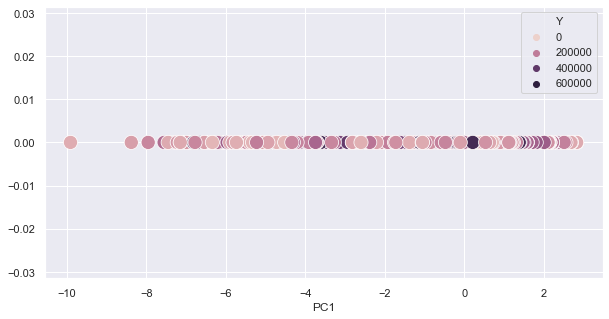

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.scatterplot (res ['PC1'], [0] * len (res), hue = res ['Y'], s = 200)

*Veamos ahora cómo se ve esto en un espacio 2D:*

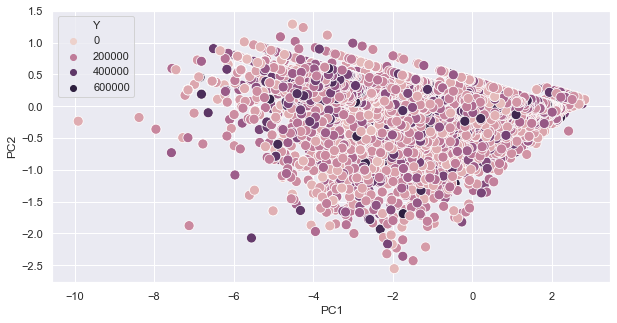

In [62]:
plt.figure (figsize = (10, 5)) 
sns.scatterplot(res['PC1'], res['PC2'], hue=res['Y'], s=100)

* En ambos gráficos se observa que las variables son difíciles de separar.

### Se entrena el modelo implementado en la Entrega 01 - en particular, el árbol de decisión.

In [63]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_escalado)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (71940, 3)
transformed shape: (71940, 3)


In [64]:
print(pca.components_)

[[ 0.58419539  0.59574699  0.55118171]
 [-0.48985853 -0.28265565  0.82470868]
 [ 0.64711233 -0.75179207  0.12670562]]


* Los datos transformados se han reducido a una sola dimensión. Para comprender el efecto de esta reducción de dimensionalidad, podemos realizar la transformación inversa de estos datos reducidos y trazarlos junto con los datos originales.
* Esto deja en claro lo que significa una reducción de dimensionalidad de PCA: se elimina la información a lo largo del eje o ejes principales menos importantes, dejando solo el componente o componentes de los datos con la mayor varianza.
*Este conjunto de datos de dimensión reducida es, en algunos sentidos, "lo suficientemente bueno" para codificar las relaciones más importantes entre los puntos: a pesar de reducir la dimensión de los datos en un 75%, la relación general entre los puntos de datos se conserva en su mayoría.

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.30, random_state=42)

In [66]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

lista_rmse_train_dt = []
lista_rmse_test_dt = []

max_depths = [1,2,3,4,5,6,7,8,9,10,20,25,30,40,50,80]

for max_depth in max_depths:

    # Definir el modelo con la profundidad deseada
    tree_regressor = DecisionTreeRegressor(max_depth = max_depth, random_state=10)
    
    tree_regressor.fit(X_train, y_train)
    
    y_train_pred = tree_regressor.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    y_test_pred = tree_regressor.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    lista_rmse_train_dt.append(rmse_train)
    lista_rmse_test_dt.append(rmse_test)

Text(0.5, 1.0, 'Curva de Validación - Árbol de Decisión')

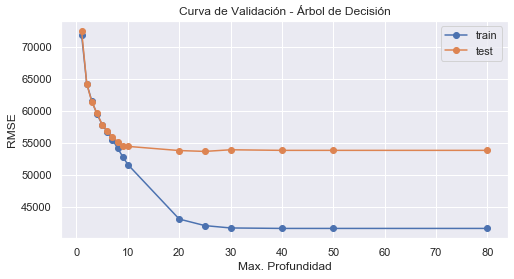

In [67]:
plt.figure(figsize = (8,4))
plt.plot(max_depths, lista_rmse_train_dt,'o-',label='train' )
plt.plot(max_depths, lista_rmse_test_dt,'o-',label='test')
plt.legend()
plt.xlabel("Max. Profundidad")
plt.ylabel("RMSE")
plt.title('Curva de Validación - Árbol de Decisión')

In [68]:
print("Profundidad con mínimo RMSE para train:",max_depths[lista_rmse_train_dt.index(min(lista_rmse_train_dt))],"con un valor de",lista_rmse_train_dt[lista_rmse_train_dt.index(min(lista_rmse_train_dt))])

print("Profundidad con mínimo RMSE para test:",max_depths[lista_rmse_test_dt.index(min(lista_rmse_test_dt))],"con un valor de",lista_rmse_test_dt[lista_rmse_test_dt.index(min(lista_rmse_test_dt))])

Profundidad con mínimo RMSE para train: 40 con un valor de 41638.82804195127
Profundidad con mínimo RMSE para test: 25 con un valor de 53648.49060297613


In [69]:
regresor = DecisionTreeRegressor(max_depth=25, random_state=10)
regresor.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=25,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=10, splitter='best')

In [70]:
y_train_pred = regresor.predict(X_train)
y_test_pred = regresor.predict(X_test)

In [71]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_train,y_train_pred).round())
print(mean_squared_error(y_test,y_test_pred).round())

1770423779.0
2878160544.0


In [72]:
regresor.feature_importances_

array([0.76418335, 0.12962192, 0.10619473])

## PARTE B - Modelos Avanzados ##

6. Elige dos de los modelos avanzados vistos (en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización). Entrénalos y evalúalos con sus argumentos por defecto. No te olvides de hacer un train/test split y usar Validación Cruzada.

7. Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.

8. Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.

### Repetimos los Modelos Aplicados en el Proyecto Anterior

#### 1. Regresión Lineal

In [73]:
X = X_escalado
y = properati_6[['price']]

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50358, 3) (50358, 1) (21582, 3) (21582, 1)


In [75]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [76]:
linear_model.fit(X_train, y_train)
print(linear_model.coef_, linear_model.intercept_) 

[[24481.48593872 53658.62134912 -7790.25190455]] [189557.96109675]


Modelo: Regresión lineal
Raíz del error cuadrático medio en Train: 61652.66859167018
Raíz del error cuadrático medio en Test: 61935.13756353894


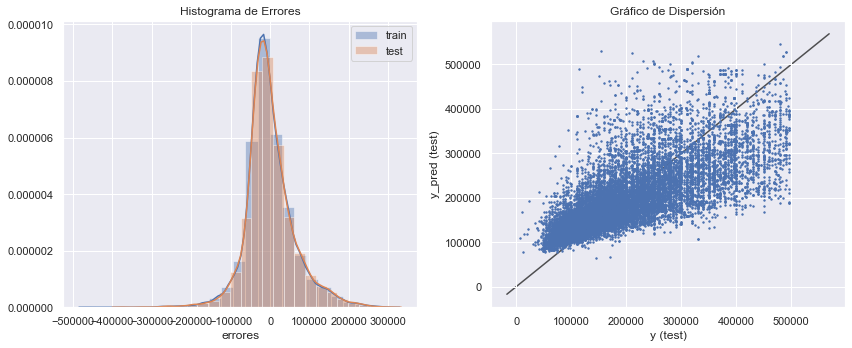

In [77]:
from sklearn.metrics import mean_squared_error
modelo = ['Regresión lineal']

for i, model in enumerate([linear_model]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {modelo[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (12,5))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 25, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 25, label = 'test')
    plt.xlabel('errores')
    plt.title('Histograma de Errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]),  
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    plt.title('Gráfico de Dispersión')
    
    plt.tight_layout()
    plt.show()

#### 2. Árboles de Decisión y Vecinos más Cercanos

In [78]:
X = X_escalado
y = properati_6[['price']]

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [80]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

tree_regressor = DecisionTreeRegressor(max_depth=25, random_state=10)
knn_regressor = KNeighborsRegressor(n_neighbors=8)

In [81]:
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                    weights='uniform')

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 41411.18177077057
Raíz del error cuadrático medio en Test: 53168.56462959992


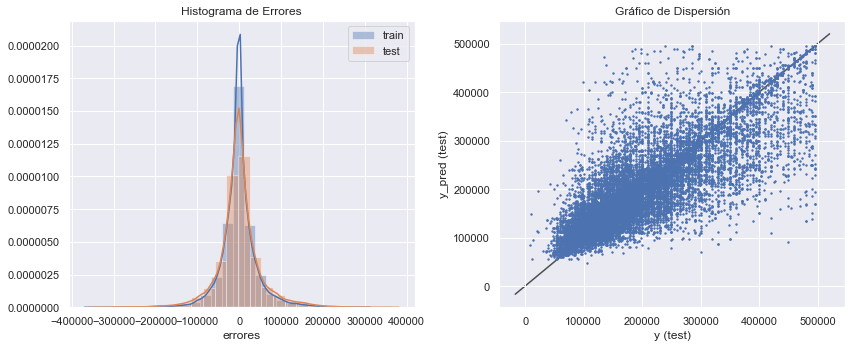

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 49554.691259121064
Raíz del error cuadrático medio en Test: 53675.69821389999


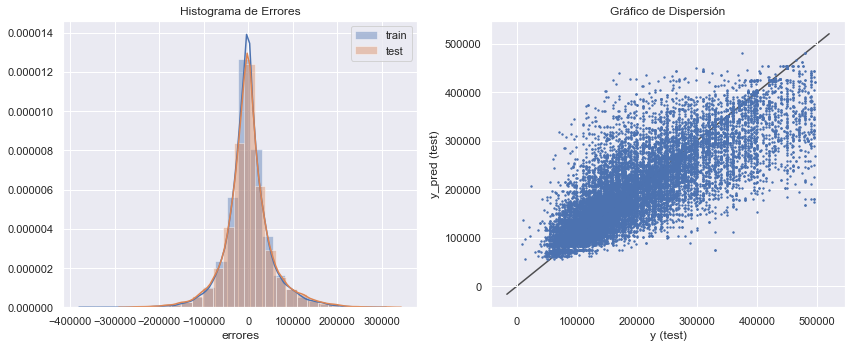

In [82]:
modelos = ['Árbol de Decisión', 'Vecinos más cercanos']
for i, model in enumerate([tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train).reshape(50358,1)
    y_test_pred = model.predict(X_test).reshape(21582,1)
    
    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (12,5))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 25, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 25, label = 'test')
    plt.xlabel('errores')
    plt.title('Histograma de Errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    plt.title('Gráfico de Dispersión')
    
    plt.tight_layout()
    plt.show()

### Regresión Lineal con Atributos Polinómicos y Regularización

In [83]:
X = X_escalado
y = properati_6[['price']]
# y_real = -1.5*X**3+3*X**2+1

In [84]:
from sklearn.preprocessing import PolynomialFeatures

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [86]:
# Atributo original: corresponde a una sola columna

poly = PolynomialFeatures (3, include_bias = False) # Preprocesamiento, de "Grado 7" // Que no carge el corte con eje y (+b)
X_train_new = poly.fit_transform(X_train) # Conjunto de datos que incluye los nuevos atributos, las nueva columnas
X_test_new = poly.fit_transform(X_test)

# Ahora son 3 columnas. Son nuevas combinaciones lineales del atributo original
# A la vista, elevó a la 1, a la 2, a la 3

In [87]:
reg = LinearRegression()
reg.fit(X_train_new, y_train)
y_train_pred = reg.predict(X_train_new)
y_test_pred = reg.predict(X_test_new)

Raíz del error cuadrático medio en Train: 57904.276667100305
Raíz del error cuadrático medio en Test: 58224.18996561524


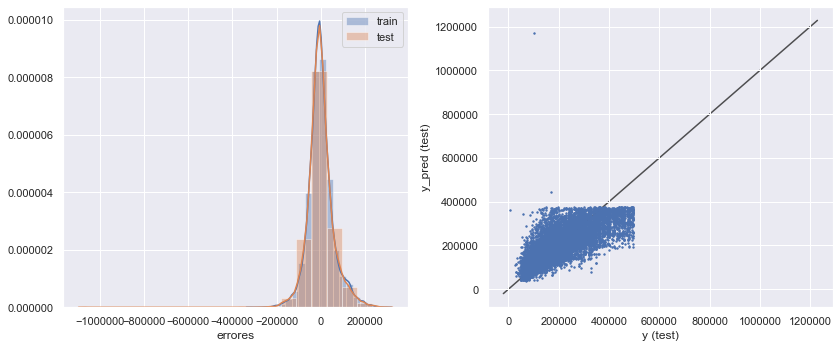

In [88]:
def evaluar_regresion(model,X,y, X_train, X_test, y_train, y_test):
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculamos el Error
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

    ### Graficamos los Resultados
    plt.figure(figsize = (17,5))
    #plt.subplot(1,3,1)
    #plt.scatter(X, y, s = 2, label = 'Datos')
    #plt.plot(X, y_real, '--',label ='Curva Teórica', c = 'r')
    
    #list1, list2 = zip(*sorted(zip(X_train[:,0], y_train_pred)))
    #plt.plot(list1, list2,label ='Regresión (train)')
    
    #list1, list2 = zip(*sorted(zip(X_test[:,0], y_test_pred)))
    #plt.plot(list1, list2,label = 'Regresión (test)')

    #plt.xlabel('X')
    #plt.ylabel('y')
    #plt.legend()


    plt.subplot(1,3,2)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,3,3)
    ax.scatter(y_test,y_test_pred, s =2)

    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]

    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')

    plt.tight_layout()
    plt.show()
    
evaluar_regresion(reg, X,y, X_train_new, X_test_new, y_train, y_test)

#### Regularización

* **Regulación L2 o RIDGE:** Se agrega a la función de Costo, un término proporcional al cuadrado del valor de los coeficientes de peso. La penalización, encoge los coeficientes hacia el Cero.
    * El valor de Alpha, puede ser de 0.1 hasta el valor que se desee.
    * Cuanto mayor sea el valor de alfa, menos varianza exhibirá su modelo y menor será la dispersión de los datos.
* **Regulación L1 o LASSO:** Se agrega a la función de Costo, un término proporcional al valor absoluto de los coeficientes de peso. La penalización, encoge los coeficientes hacia el Cero o convierte a algunos coeficientes en Cero. Así, elimina las características menos importantes en nuestro modelo.
    * El valor de Alpha, puede variar de 0.1 a 1.

Empezamos entrenando el modelo `Ridge`. Presta atención a sus coeficientes:

In [89]:
from sklearn.linear_model import Ridge, Lasso

reg_ridge = Ridge(alpha= 0.1) # Alpha es el PARÁMETRO DE PENALIZACIÓN
reg_ridge.fit(X_train_new,y_train)

print(f'Pendientes: {reg_ridge.coef_}')
print(f'Ordenada: {reg_ridge.intercept_}')

Pendientes: [[ 78471.34163062  34146.62754484 -16333.60506692 -78492.46583254
  127072.84631464   1945.97797736 -61538.15963297   2243.97264425
   -3602.44969853  19416.00227926 -48097.79602709    237.53727921
   31581.21697033   6186.49085617  -2708.62107677  -5767.13692021
   -3708.5632203     671.75668459    573.25978766]]
Ordenada: [210707.09638159]


Raíz del error cuadrático medio en Train: 57904.27725453594
Raíz del error cuadrático medio en Test: 58224.05112757408


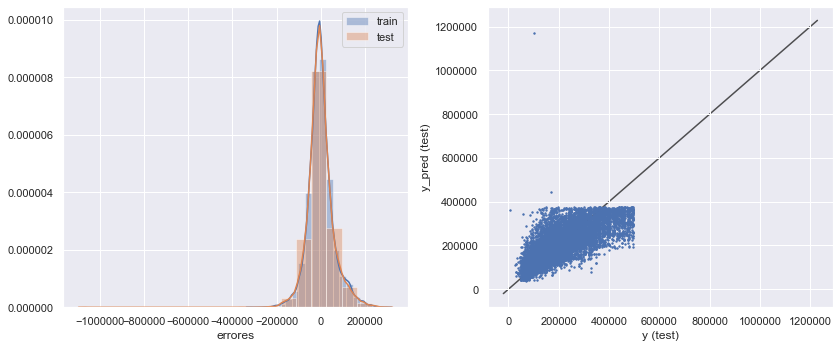

In [90]:
evaluar_regresion(reg_ridge, X,y, X_train_new, X_test_new, y_train, y_test)

**Para Probar:** modifica el valor de `alpha` y observa su efecto. ¿Cómo cambian los coeficientes? **Tip:** varía en órdenes de magnitud,  (10, 5, 1, 0.5, 0.1 ,0.01, 0.005, 0.001, etc.).

Pendientes: [[ 78134.43469011  34401.62309352 -16310.78971943 -77886.93755695
  125702.84263646   2148.23073665 -60810.32851277   2078.60640203
   -3607.20630519  19242.65457107 -47567.38122759    137.38118222
   31151.57895138   6332.49809206  -2711.61640203  -5677.45028112
   -3762.14057565    674.8150917     573.53728879]]
Ordenada: [210657.65866138]
Raíz del error cuadrático medio en Train: 57904.334136277095
Raíz del error cuadrático medio en Test: 58222.871755584754


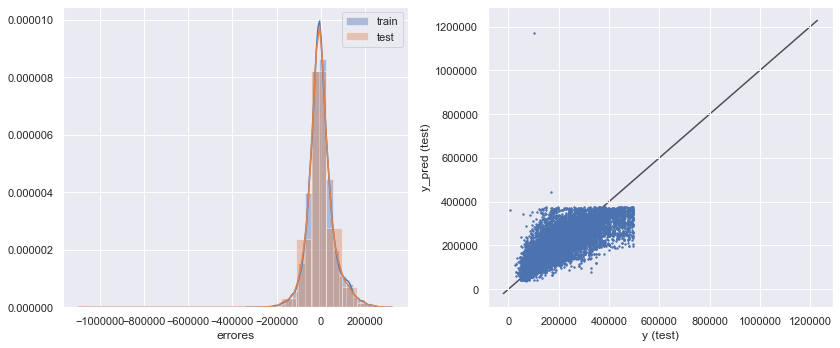

In [91]:
reg_ridge = Ridge(alpha= 1)
reg_ridge.fit(X_train_new,y_train)

print(f'Pendientes: {reg_ridge.coef_}')
print(f'Ordenada: {reg_ridge.intercept_}')

evaluar_regresion(reg_ridge, X,y, X_train_new, X_test_new, y_train, y_test)

Ahora, el modelo `Lasso`:

In [92]:
reg_lasso = Lasso(alpha = 0.3)
reg_lasso.fit(X_train_new,y_train)
print(reg_lasso.coef_, reg_lasso.intercept_)

[ 62389.88228438  47072.81436915 -16101.29379272 -44393.96156973
  61183.96139437   2032.37579835 -30788.64493854   3157.64236251
  -3950.18855666   8661.59180315 -19680.52209618    457.91303813
   9895.57013402   4569.39400547  -2380.74067002  -1065.49309656
  -2683.23432808    327.7709244     608.41961911] [208192.24612795]


C:\Users\Ale\anaconda3\envs\ds\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90676981801443.7, tolerance: 47587796686.580574
  model = cd_fast.enet_coordinate_descent(


In [93]:
# evaluar_regresion(reg_lasso, X,y, X_train_new, X_test_new, y_train, y_test)

## ERROR

**Para Probar:** nuevamente, modifica el valor de `alpha` y observa su efecto. ¿Cómo cambian los coeficientes?¿Notas alguna diferencia con el modelo `Ridge`? ¡Hay una diferencia importante, que hace que la regresión `Lasso` sea muy apreciada!

## Validación Cruzada

In [94]:
X = properati_6[['surface_total','surface_covered','bedrooms']]
y = properati_6[['price']]

In [95]:
from sklearn.preprocessing import StandardScaler # Para hacer transformación con Z-Score

scl = StandardScaler()
X = scl.fit_transform(X)

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

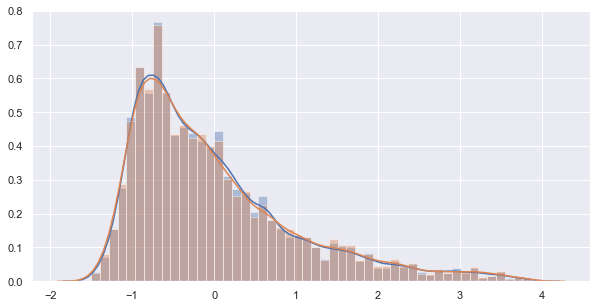

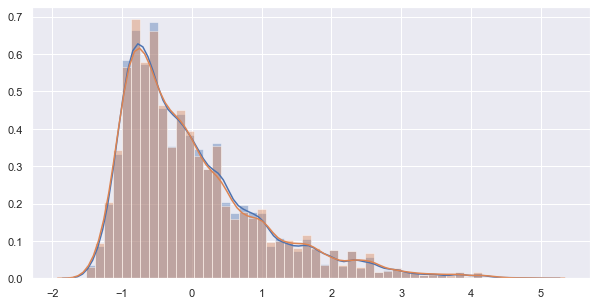

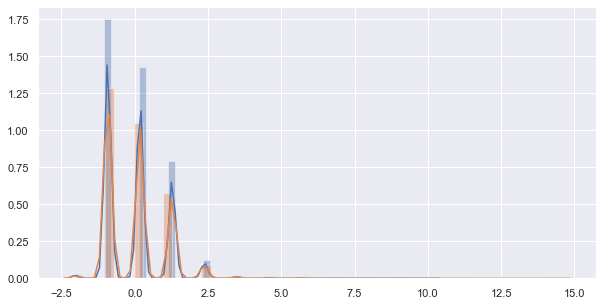

In [97]:
for i in range(X_train.shape[1]):
    plt.figure(figsize=(10,5))
    sns.distplot(X_train[:,i])
    sns.distplot(X_test[:,i])
    plt.show()

In [98]:
print('Proporcion de etiquetas positiva en los datos de Train: ', y_train.sum()/y_train.size)
print('Proporcion de etiquetas positiva en los datos de Test: ', y_test.sum()/y_test.size)

Proporcion de etiquetas positiva en los datos de Train:  price    189852.65
dtype: float64
Proporcion de etiquetas positiva en los datos de Test:  price    189653.13
dtype: float64


In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

#### Probamos

In [100]:
from sklearn.model_selection import cross_val_score

In [101]:
tree = DecisionTreeClassifier()
tree_scores = cross_val_score(tree, X, y, cv=3) # Parámetros: modelo, X, y, CV = K-fold
# El split lo hace cross_val_score
# Guardamos el resultado de los scores en tree_scores

knn = KNeighborsClassifier(n_neighbors=1)
knn_scores = cross_val_score(knn, X, y, cv=3)

C:\Users\Ale\anaconda3\envs\ds\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Ale\anaconda3\envs\ds\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Ale\anaconda3\envs\ds\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ale\anaconda3\envs\ds\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

In [102]:
print(tree_scores, knn_scores)
# print(tree_scores.mean(), knn_scores.mean())
print("Accuracy para Tree: %0.2f (+/- %0.2f)" % (tree_scores.mean(), tree_scores.std() * 2))
print("Accuracy para KNN: %0.2f (+/- %0.2f)" % (knn_scores.mean(), knn_scores.std() * 2))

[0.23177648 0.21109258 0.21438699] [0.15775646 0.1440367  0.15608841]
Accuracy para Tree: 0.22 (+/- 0.02)
Accuracy para KNN: 0.15 (+/- 0.01)


In [103]:
from sklearn.model_selection import cross_validate
# Hace los splits
# Entrega información métrica sobre como ocurrió la evaluación

In [104]:
# La validación cruzada hace los splits, entrena y almacena los resultados de las métricas obtenidas.
tree_scores = cross_validate(tree, X, y, cv=3)
knn_scores = cross_validate(knn, X, y, cv=3)

C:\Users\Ale\anaconda3\envs\ds\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Ale\anaconda3\envs\ds\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Ale\anaconda3\envs\ds\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Ale\anaconda3\envs\ds\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

In [105]:
# Muestra las medias obtenidas en cada ejecución;
# Los tiempos que demoró en hacer los cálculos de cada ejecución y;
# Los Scores asociados a la prueba que está ejecutando
print(tree_scores)
print(knn_scores)

{'fit_time': array([0.90728307, 0.9118247 , 0.91086411]), 'score_time': array([0.40223241, 0.4218595 , 0.39707565]), 'test_score': array([0.23177648, 0.21113428, 0.2147206 ])}
{'fit_time': array([0.60646772, 0.62234211, 0.63111758]), 'score_time': array([1.69845843, 2.00738645, 2.25126433]), 'test_score': array([0.15775646, 0.1440367 , 0.15608841])}


In [107]:
import scipy as sp

from sklearn.model_selection import RandomizedSearchCV # Búsqueda aleatoria en hiperparámetros.

In [108]:
# Grilla para Random Search
param_dist = {'n_neighbors':sp.stats.randint(1, 20),
              'weights': ['uniform', 'distance'], 
              'leaf_size':sp.stats.randint(1, 10),
              'algorithm':['auto', 'kd_tree']}

In [ ]:
model = RandomizedSearchCV(knn, param_dist,n_iter=50, random_state=0, cv=5)

# Entrenamos: KNN con la grilla definida arriba y CV con tamaño de Fold=5
model.fit(X_train, y_train)

In [ ]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

scores = pd.DataFrame(model.cv_results_)
scores

In [ ]:
#Predecimos en los datos de test
prediction = model.predict(X_test)

In [ ]:
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

## PARTE C - Interpretación de modelos ##

De acuerdo a lo que el modelo permite, responde algunas o todas las siguientes preguntas:

9. ¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no? Si usaste una regresión lineal con regularización, presta atención a los parámetros (pendientes) obtenidas. Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles al azar y observa qué atributos considera importantes. ¿En qué se diferencian esos árboles? ¿Por qué? Finalmente, responde, ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?

10. ¿Cómo es la distribución de errores (regresión) o qué clases se confunden entre sí (clasificación)? ¿Dónde falla? ¿A qué se debe?

### DESAFÍO OPCIONAL ###

Aplica una técnica de Clustering sobre el dataset. Puedes combinar con técnicas de reducción de dimensionalidad para facilitar la visualización. ¿Qué clusters encuentras? ¿A qué pueden corresponder? Te dejamos preguntas que pueden servir como disparadoras: ¿qué barrios se parecen más entre sí?¿qué tipos de propiedades se parecen más entre sí?